<a href="https://colab.research.google.com/github/mahapara2411/Sentiment-Analysis/blob/master/Sentiment_analysis_for_Hotels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [155]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


In [97]:
from google.colab import files
uploaded = files.upload()

Saving Tripadvisor Datasource.csv to Tripadvisor Datasource (1).csv


In [98]:
# Dataset is now stored in a Pandas Dataframe
import io
data = pd.read_csv(io.BytesIO(uploaded['Tripadvisor Datasource.csv']))

In [99]:
data.head()

,Hotel_id,Hotel,Review_id,Title,Users,Reviews,Rating
0,g297628-d503249,Royal Orchid Central,r758572477,Great hospitality,Afreen A,It was very memorable stay at Royal orchid cen...,5
1,g297628-d503249,Royal Orchid Central,r758007447,A royal living,Srikumar D,The Things happen with the time remember for l...,5
2,g297628-d503249,Royal Orchid Central,r757841035,Delight stay,devendranakka,My. stay was very comfortable e delightful.Thi...,5
3,g297628-d503249,Royal Orchid Central,r757272486,Institutional quarantine,Ashesha G Bhatta,I stayed here for 7 days & I was really happy ...,4
4,g297628-d503249,Royal Orchid Central,r757252794,Wonderful stay,Jaya,Had a very comfortable stay. Services of staff...,5


In [100]:
data['Sentiment'] = data['Rating'].apply(lambda Rating: 'Positive' if Rating > 3 else 'Negative')
data.head(5)

,Hotel_id,Hotel,Review_id,Title,Users,Reviews,Rating,Sentiment
0,g297628-d503249,Royal Orchid Central,r758572477,Great hospitality,Afreen A,It was very memorable stay at Royal orchid cen...,5,Positive
1,g297628-d503249,Royal Orchid Central,r758007447,A royal living,Srikumar D,The Things happen with the time remember for l...,5,Positive
2,g297628-d503249,Royal Orchid Central,r757841035,Delight stay,devendranakka,My. stay was very comfortable e delightful.Thi...,5,Positive
3,g297628-d503249,Royal Orchid Central,r757272486,Institutional quarantine,Ashesha G Bhatta,I stayed here for 7 days & I was really happy ...,4,Positive
4,g297628-d503249,Royal Orchid Central,r757252794,Wonderful stay,Jaya,Had a very comfortable stay. Services of staff...,5,Positive


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Hotel_id   701 non-null    object
 1   Hotel      701 non-null    object
 2   Review_id  699 non-null    object
 3   Title      701 non-null    object
 4   Users      701 non-null    object
 5   Reviews    701 non-null    object
 6   Rating     701 non-null    int64 
 7   Sentiment  701 non-null    object
dtypes: int64(1), object(7)
memory usage: 43.9+ KB


In [102]:
data.Sentiment.value_counts()


Positive    652
Negative     49
Name: Sentiment, dtype: int64

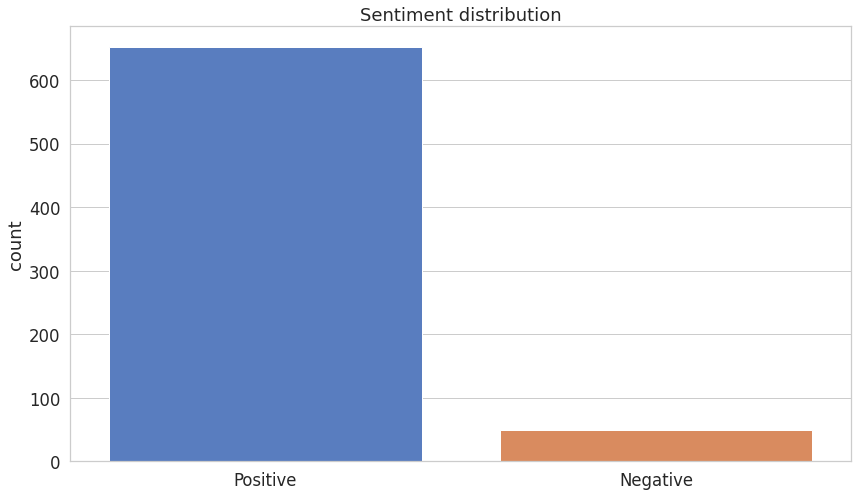

In [103]:
f = sns.countplot(x='Sentiment', data=data)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Positive', 'Negative'])
plt.xlabel("");

In [104]:
positive_sentiment=data[data['Sentiment'] == 'Positive']
negative_sentiment=data[data['Sentiment']=='Negative']

In [105]:

Reviews_all=" ".join(review for review in data.Sentiment)
Reviews_positive=" ".join(review for review in positive_sentiment.Reviews)
Reviews_negative=" ".join(review for review in negative_sentiment.Reviews)

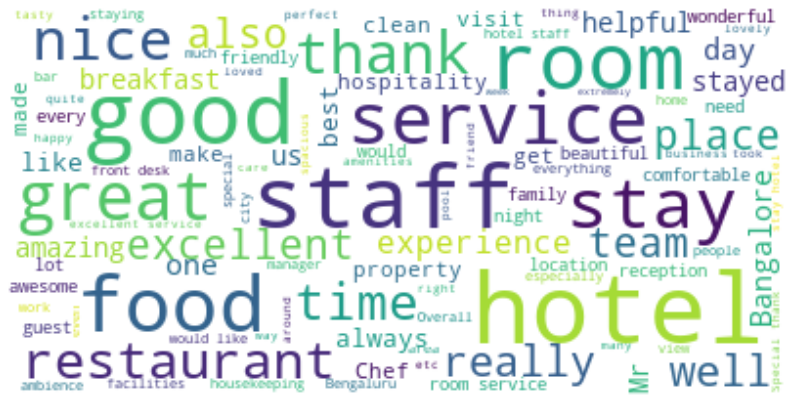

In [106]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(Reviews_positive)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

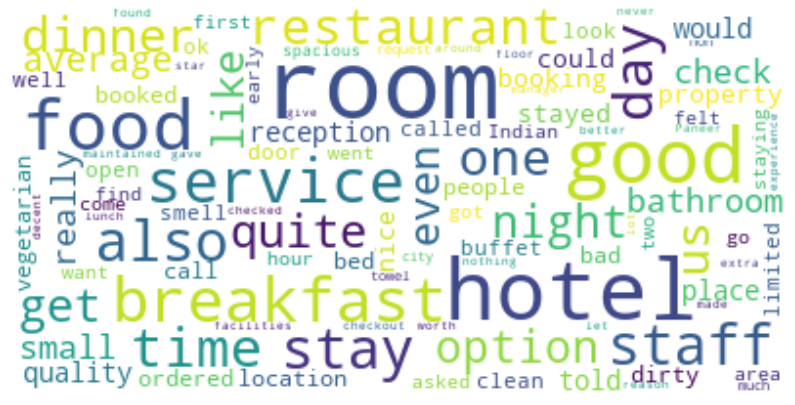

In [107]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(Reviews_negative)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

In [108]:
def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct

data['Text_Clean'] = data['Reviews'].apply(lambda x: remove_punct(x))

In [109]:
from nltk import word_tokenize, WordNetLemmatizer
tokens = [word_tokenize(sen) for sen in data.Text_Clean]

In [110]:
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

In [111]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

In [112]:
def remove_stop_words(tokens): 
    return [word for word in tokens if word not in stoplist]

In [113]:
filtered_words = [remove_stop_words(sen) for sen in lower_tokens]

In [114]:
result = [' '.join(sen) for sen in filtered_words]

In [115]:
data['Text_Clean'] = result

In [116]:
result[3]

'stayed 7 days really happy service provided worth rates low due govts intervention want highlight good points experienced inspite limited staff availablity 1 prepared fresh hot dinner midnightaround 1am served everyone checked time 2 facing wifi connectivity issues room coffee kettle work properly lead splash requested clean fix wifi issue offered new room wifi router defective room much better compared previous one 3 service punctual breakfast lunch dinner room dining food tasty healthy overall took'

In [117]:
data['tokens'] = filtered_words


In [118]:
data = data[['Hotel_id','Hotel','Review_id','Title','Users','Reviews','Text_Clean', 'Rating','tokens','Sentiment']]
data.head(5)

,Hotel_id,Hotel,Review_id,Title,Users,Reviews,Text_Clean,Rating,tokens,Sentiment
0,g297628-d503249,Royal Orchid Central,r758572477,Great hospitality,Afreen A,It was very memorable stay at Royal orchid cen...,memorable stay royal orchid central friendly s...,5,"[memorable, stay, royal, orchid, central, frie...",Positive
1,g297628-d503249,Royal Orchid Central,r758007447,A royal living,Srikumar D,The Things happen with the time remember for l...,things happen time remember long timethe trip ...,5,"[things, happen, time, remember, long, timethe...",Positive
2,g297628-d503249,Royal Orchid Central,r757841035,Delight stay,devendranakka,My. stay was very comfortable e delightful.Thi...,stay comfortable e delightfulthis ia first vis...,5,"[stay, comfortable, e, delightfulthis, ia, fir...",Positive
3,g297628-d503249,Royal Orchid Central,r757272486,Institutional quarantine,Ashesha G Bhatta,I stayed here for 7 days & I was really happy ...,stayed 7 days really happy service provided wo...,4,"[stayed, 7, days, really, happy, service, prov...",Positive
4,g297628-d503249,Royal Orchid Central,r757252794,Wonderful stay,Jaya,Had a very comfortable stay. Services of staff...,comfortable stay services staff good ambience ...,5,"[comfortable, stay, services, staff, good, amb...",Positive


In [119]:
data['Label'] = data['Sentiment'].apply(lambda Sentiment: '1' if Sentiment is 'Positive' else '0')
data.head(5)

,Hotel_id,Hotel,Review_id,Title,Users,Reviews,Text_Clean,Rating,tokens,Sentiment,Label
0,g297628-d503249,Royal Orchid Central,r758572477,Great hospitality,Afreen A,It was very memorable stay at Royal orchid cen...,memorable stay royal orchid central friendly s...,5,"[memorable, stay, royal, orchid, central, frie...",Positive,1
1,g297628-d503249,Royal Orchid Central,r758007447,A royal living,Srikumar D,The Things happen with the time remember for l...,things happen time remember long timethe trip ...,5,"[things, happen, time, remember, long, timethe...",Positive,1
2,g297628-d503249,Royal Orchid Central,r757841035,Delight stay,devendranakka,My. stay was very comfortable e delightful.Thi...,stay comfortable e delightfulthis ia first vis...,5,"[stay, comfortable, e, delightfulthis, ia, fir...",Positive,1
3,g297628-d503249,Royal Orchid Central,r757272486,Institutional quarantine,Ashesha G Bhatta,I stayed here for 7 days & I was really happy ...,stayed 7 days really happy service provided wo...,4,"[stayed, 7, days, really, happy, service, prov...",Positive,1
4,g297628-d503249,Royal Orchid Central,r757252794,Wonderful stay,Jaya,Had a very comfortable stay. Services of staff...,comfortable stay services staff good ambience ...,5,"[comfortable, stay, services, staff, good, amb...",Positive,1


In [126]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(result).toarray()

y=pd.get_dummies(data['Label'])
y=y.iloc[:,1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [132]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [133]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

In [134]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

In [136]:
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.9361702127659575
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         9
           1       0.98      0.95      0.97       132

    accuracy                           0.94       141
   macro avg       0.74      0.81      0.77       141
weighted avg       0.95      0.94      0.94       141



In [137]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  6,   3],
       [  6, 126]])

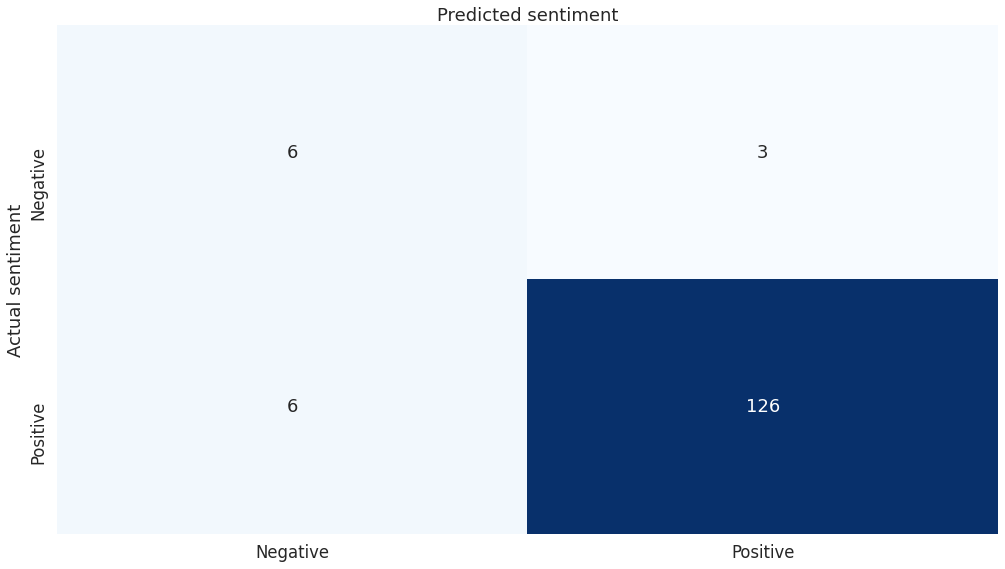

In [139]:
class_names = ["Negative", "Positive"]
fig,ax = plt.subplots()


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual sentiment')
plt.xlabel('Predicted sentiment');

KNN Model

In [140]:
#KNN models with only 1 neighbour
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [141]:
y_pred = classifier.predict(X_test)

In [144]:
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.8936170212765957
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         9
           1       0.95      0.93      0.94       132

    accuracy                           0.89       141
   macro avg       0.60      0.63      0.61       141
weighted avg       0.91      0.89      0.90       141



In [146]:
error = []

# Calculating error for K values between 1 and 5
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(error)

[0.10638297872340426]
[0.10638297872340426, 0.15602836879432624]
[0.10638297872340426, 0.15602836879432624, 0.06382978723404255]
[0.10638297872340426, 0.15602836879432624, 0.06382978723404255, 0.06382978723404255]


In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [149]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(141,)

In [152]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [153]:
y_pred = classifier.predict(X_test)

In [156]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9361702127659575
[[  1   9]
 [  0 131]]
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.94      1.00      0.97       131

    accuracy                           0.94       141
   macro avg       0.97      0.55      0.57       141
weighted avg       0.94      0.94      0.91       141

